
# Práctica 1: Metaheurísticas basadas en trayectorias: Temple Simulado

<center><h3>
    Nerea Freiría Alonso
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guion hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guion. Responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los ejercicios"**. Por favor, no modifiques ninguna línea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_TempleSimulado.zip` que contenga los siguientes ficheros:

 * `APELIDOS_NOME_TempleSimulado.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_TempleSimulado.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problemas utilizados en la resolución.


## Preliminares adicionales sobre Python para esta práctica


Conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte especialmente útiles más adelante en la realización de esta práctica.


Por ejemplo, puedes generar números aleatorios de la siguiente forma utilizando el paquete `random`.

In [1]:
import random

# podemos crear un numero aleatorio entre 1 y 10
numero_aleatorio = random.randint(1, 10)
print(numero_aleatorio)

# y números aleatorios entre 0 y 1 siguiendo también una distribución uniforme
numero_U = random.uniform(0,1)
print (numero_U)


4
0.3599743873611133


Puedes generar vectores de números fijos y aleatorios que a su vez estén barajados de manera aleatoria como se ilustra a continuación.

In [2]:
vector = [x for x in range (1,10)]
print ("vector fijo ", vector)

random.shuffle(vector)
print (vector)

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

random.shuffle(vector_aleatorio)
print (vector_aleatorio)


vector fijo  [1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 8, 7, 3, 9, 5, 4, 2, 6]
vector aleatorio  [2, 7, 9, 4, 3, 7, 1, 6, 9]
[6, 1, 9, 7, 9, 4, 7, 2, 3]


Puedes incluso fijar la semilla para generar números aleatorios si quisieras que la aleatorización fuera determinista (i.e., secuencias de números aletorios que pueden ser reproducibles). Fíjate en el siguiente ejemplo que muestra como esta determina la secuencia de número si se establece una semilla y por tanto su repitibilidad. Esto puede ser útil si queremos asegurar que dos ejecuciones den el mismo resultado.

In [3]:
import time
# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)



vector aleatorio  [4, 1, 10, 3, 6, 9, 8, 2, 5]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Un último ejemplo del uso de la semilla sería establecerla justo antes de invocar a una función que queremos hacer la aleatorización totalmente determinista por cuestiones reproducibilidad. Puedes averiguar más en: https://docs.python.org/3/library/random.html

In [4]:

def mi_funcion_pseudo_aleatoria (semilla=None):
    # también podemos recibir la semilla y establecerla en la primera línea
    if (semilla is not None):
        random.seed(semilla)
        
    mi_vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
    return mi_vector_aleatorio
    

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(54321)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)

random.seed(12345)
vector_aleatorio = mi_funcion_pseudo_aleatoria()
print ("vector aleatorio ", vector_aleatorio)


vector_aleatorio = mi_funcion_pseudo_aleatoria(12345)
print ("vector aleatorio ", vector_aleatorio)



vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [8, 2, 4, 3, 9, 9, 7, 3, 6]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]
vector aleatorio  [7, 1, 5, 6, 4, 5, 10, 7, 3]


Otro conjunto de funciones importantes son las que vienen del módulo `math`. Puedes encontrar una lista de las funciones disponibles en https://docs.python.org/3/library/math.html. Ponemos a continuación algunos ejemplos de uso.

In [5]:
import math 

# número e elevado a la potencia indicada
e=math.exp(1)
print (e)

power2_e=math.exp(2)
print (power2_e)

# ejemplo de potencia
print(math.pow(e, 1))
print(math.pow(e, 2))

# ejemplo del logaritmo natural de base e
base = e
print (math.log(e))
print (math.log(e, base))


2.718281828459045
7.38905609893065
2.718281828459045
7.3890560989306495
1.0
1.0


Finalmente, las funciones del módulo `time` te permiten obtener de manera aproximada tiempos de ejecución de secciones concretas de código. 

In [6]:
import time
start_time = time.time()

sum = 0
for i in range(1000000):
    sum = sum * 1

print("---- %s segundos ----" % (time.time() - start_time))

---- 0.18641066551208496 segundos ----


## El Problema del Viajante de Comercio (VC) con Temple Simulado

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Enfriamiento o Temple Simulado (SA, del inglés Simulated Annealing). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).

Típicamente, el problema parte de una representación mediante un grafo ponderado G=(N, A), donde N es el conjunto de n=|N| nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco (i, j) ∈ A tiene asignado un peso d_ij que representa la distancia entre las ciudades i y j.


Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la fórmula del semiverseno https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno, que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra.


En primer lugar deberás importar el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [7]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [8]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

In [9]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')

print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))
g3= Localizaciones(filename='./data/US120.txt')

55.88273580792048
119.30959564041359


El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo G. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 

El problema pertenece a la categoría de problemas NP, ya que el espacio de búsqueda posible está formado por todas las permutaciones de las n ciudades. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


## P1.1: Implementación básica de Temple Simulado



Implementa el algoritmo básico de Temple Simulado para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva (Véase el T1, diapositiva 40 y asociadas).

Ten en cuenta las siguientes consideraciones de diseño para completar la implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones)  comenzando y finalizando en la ciudad 0. 

- Solución inicial: generación aleatoria de una permutación válida.

- Operador  de  selección  de  la  solución  siguiente  Scand  a  partir  de  la  actual  Sact:  operador  de  intercambio. 

- Velocidad de enfriamiento: se ha generado un único vecino. 

- Función de coste: suma de las distancias del camino según el orden del recorrido.

- Mecanismo de enfriamiento: mecanismo exponencial decreciente que sigue la expressión 𝑇(𝑘)=T0·𝑒(−𝜆𝑘), donde 𝑘 es el número de iteración y T0, λ son los parámetros de diseño.

    Para esta implementación básica considera, 𝑇(𝑘) = 20 · 𝑒(−0.0045𝑘), para establecer los parámetros por defecto de T0 y 𝜆, con temperatura inicial fija T0=20 y 𝜆=0.0045 respectivamente.

- Condición de parada: número fijo de iteraciones (limite=1000). No se precisa definir Tfinal.

Para verificar tu implementación, puedes utilizar el fichero de localizaciones de 8 ciudades gallegas (*grafo8cidades.txt*). La solución óptima resuelta con una búsqueda informada como A* se sitúa en torno a los 382km.

Para comprobar que tu implementación es suficientemente general como para manejar problemas del VC diferentes tallas, puedes probar también con el fichero de localizaciones de 120 ciudades de USA proporcionado en esta práctica (*US120.txt*).

**IMPORTANTE**: Es imprescindible que en tu implementación tengas funciones totalmente parametrizadas para el mecanismo de enfriamiento y la función de coste; también deberías parametrizar el algoritmo para poder recibir una solución inicial y una semilla para inicializar el generador de números aleatorios al principio de la ejecución del algoritmo de Temple Simulado.


In [10]:
def selecciona_vecino(vector):
    posicion1= random.randint(0, len(vector)-1)
    posicion2= random.randint(0, len(vector)-1)
    while posicion1==posicion2:     # en canso de que sean iguales, para no permutar la misma posición, volvemos a buscar otro número
        posicion2= random.randint(0,  len(vector)-1)
    vector[posicion1], vector[posicion2]= vector[posicion2], vector[posicion1] #intercambio de posiciones
    
def calcula_costes(vector, vecCiudades):
    direcciones= vector + [0]
    total= vecCiudades.distancia(0,direcciones[0])
    for i  in range (len(direcciones)-1): #solo es necesario recorrer hasta la posición -2 ya que realizamos unn +1 en el cálculo
        total+=vecCiudades.distancia(direcciones[i],direcciones[i+1])
    return total

def VC_TempleSimulado(tem_inic, temp_final, vecCiudades):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    T=tem_inic
    for i in range (1000):
        solucion=solucion_actual.copy() # copiamos el vector
        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if  delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion
        T= tem_inic * math.exp( -0.0045*i)
    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)
    


In [11]:
contador=0

minimo=math.inf
x=0
resultados=[]
desviacion=[]
porcentajes=[]

for k in range(100):
    x=x+k*0.01
    desviacion.append (x)

for i in range (600):
    valorActual= VC_TempleSimulado(20, 0,g3)
    resultados.append(valorActual)
    if  minimo> valorActual:
        minimo = valorActual
print( "el minimo es", minimo)

for x in desviacion:
    contador=0
    for i in resultados:
        if minimo +  x*minimo >= i:
            contador+=1
    porcentajes.append((contador/600)*100)



el minimo es 73383.95897006366


In [12]:
 VC_TempleSimulado(20, 0,g1)

463.19820081345625

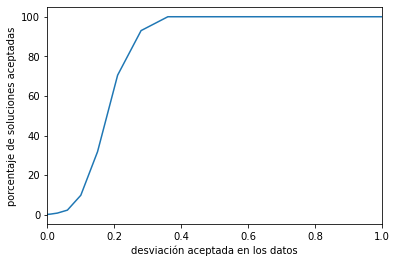

In [13]:
    
import numpy as np
import matplotlib.pyplot as plt


plt.ylabel('porcentaje de soluciones aceptadas')
plt.xlabel('desviación aceptada en los datos')
plt.plot (desviacion,porcentajes)
plt.xlim(0,1)
plt.show()


❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

❓ **Pregunta 2**. ¿Siempre obtienes soluciones óptimas en cada problema? ¿En qué proporción? Muestra cómo has realizado la verificación y explica brevemente los resultados obtenidos.

Notas: sé conservador en tu estrategia para verificar tu implementación, especialmente cuando empleas ficheros de datos grandes como el del problema de las ciudades USA. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

### Ajuste de temperatura inicial dinámico


En tu implementación has establecido la temperatura inicial siguiendo un valor fijo completamente arbitrario. Esto puede no resultar siempre adecuado, y suele ser más conveniente disponer de un ajuste de la temperatura inicial (T0) que tenga en cuenta la instancia del problema a resolver. 

Modifica la implementación anterior para que puedas parametrizar el valor inicial del parámetro de control T0 utilizando la siguiente fórmula:

    𝑇0 = −𝜇/ln(𝜙)𝐶(𝑆0), que permite aceptar (con una probabilidad 𝜙) soluciones siguientes que empeoren en μ (tanto por uno) a S0 (esto es, que sean (1+ μ) veces peores).

En la fórmula, C(S0) es el coste de la solución inicial, con 𝜙=0.50 y 𝜇=0.01.


In [14]:
def VC_TempleSimulado_V2(fi, nu, vecCiudades):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    tem_inici=(-nu/(math.log(fi)))*(calcula_costes(solucion_actual, vecCiudades))

    for i in range (1000):
        T= tem_inici * math.exp( -0.0045*i)
        solucion=solucion_actual.copy() # copiamos el vector
        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion

    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)
    


In [15]:
print(VC_TempleSimulado_V2( 0.01, 0.5, g1))
print(VC_TempleSimulado_V2(0.01, 0.5, g2))
print(VC_TempleSimulado_V2(0.01, 0.5, g3))

381.6699617675482
521.4921017929342
112361.86757063371


❓ **Pregunta 3**. Confecciona una tabla que muestre la relación de 𝐶(𝑆0), 𝜙 y 𝜇 con T0 para los dos problemas utilizados anteriormente (ciudades gallegas y ciudades USA). Entonces, de manera razonada amplia la tabla con variaciones de 𝜙 y 𝜇 para uno de los problemas. ¿Qué combinación da mayor/menor T0?


In [16]:
def VC_TempleSimulado_V3(vecCiudades, fi=0.50, nu=0.01 , C=-1):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    if(C==-1):
        tem_inici=(-nu/(math.log(fi)))*(calcula_costes(solucion_actual, vecCiudades))
    else:
        tem_inici=(-nu/(math.log(fi)))*C
    
    
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    for i in range (1000):
        T= tem_inici * math.exp( -0.0045*i)
        solucion=solucion_actual.copy() # copiamos el vector

        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion

    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return (coste_inicial, tem_inici)

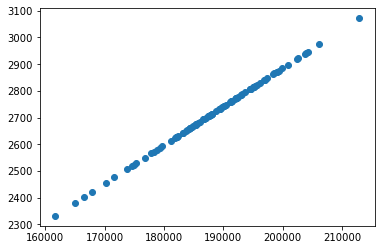

In [17]:
elementos=[]
for i in range(100):
    elementos.append(VC_TempleSimulado_V3(g3))

plt.scatter(*zip(*elementos))


In [18]:
import statistics
C=[]
C.append(min(elementos)[0])
C.append(statistics.median(list(zip(*elementos))[0]) )
C.append(max(elementos)[0])


print('el minimo es',C[0] )
print('el mediana es',C[1])
print('la máximo es',C[2] )

el minimo es 161612.7362627198
el mediana es 188469.0305498768
la máximo es 212927.7514022365


In [19]:
#creamos matrices con los valores de T0 para C(S0)= 161612.73 variando fi entre 0.001 y 1 y nu entre  0 y 3 
import numpy as np
fi= np.linspace(0.001,0.9999,8)
nu= np.linspace(0.001,3,8)



        
for c in C:
    matriz=[[]]
    print('Coste inicial:', c)
    print('___________________________________________________________')
    for i in range (len(fi)):
        fila=[]
        fila.append(fi[i])
        for j in range (len(nu)):
            fila.append(VC_TempleSimulado_V3(g3,fi[i],nu[j],c)[1])
        matriz.append(fila)

    #imprimimos los valores de la cabecera correspondientes a los valores de nu con dos decimales espacioados por tabuladores
    
    for i in range (len(nu)):
        print('\t%.2f' % nu[i], end='\t')
  
    #imprimimos formateada la matriz con dos decimales y tabuladores
    for i in range (len(matriz)):
        for j in range (len(matriz[i])):
            print('%.2f' % matriz[i][j], end='\t')
        print()
    print(' _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')


Coste inicial: 161612.7362627198
___________________________________________________________
	0.00		0.43		0.86		1.29		1.71		2.14		2.57		3.00	
0.00	23.40	10046.84	20070.29	30093.73	40117.18	50140.63	60164.07	70187.52	
0.14	83.30	35773.27	71463.24	107153.20	142843.17	178533.13	214223.10	249913.06	
0.29	129.25	55504.66	110880.06	166255.46	221630.87	277006.27	332381.68	387757.08	
0.43	191.02	82028.10	163865.18	245702.26	327539.34	409376.42	491213.50	573050.59	
0.57	289.13	124159.84	248030.54	371901.25	495771.96	619642.67	743513.37	867384.08	
0.71	480.74	206445.12	412409.49	618373.87	824338.24	1030302.62	1236266.99	1442231.37	
0.86	1048.86	450410.94	899773.02	1349135.10	1798497.18	2247859.26	2697221.34	3146583.42	
1.00	1616046.55	693976563.44	1386337080.32	2078697597.20	2771058114.09	3463418630.97	4155779147.85	4848139664.74	
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Coste inicial: 188469.0305498768
_________________________


❓ **Pregunta 4**. Escoge 5 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.



 
## P1.2: Mejoras del algoritmo de Temple Simulado

En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo con lo visto en las clases expositivas. Podrá modificarse cualquiera de los siguientes parámetros u operadores:
- El valor inicial del parámetro de control (T0).
- El mecanismo de enfriamiento.
- La velocidad de enfriamiento.
- El mecanismo de selección de las soluciones candidatas
- El criterio de parada

**Importante**: Debes mantener una implementación de la versión básica que pueda ser ejecutada en la evaluación. Así que se recomienda que la implementación del algoritmo con las mejoras sea implementada en otra función. 

❓ **Pregunta 5**. Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

**Importante**:  Para la Pregunta 5, tu informe no debería superar las 600 palabras.


#### Respuestas a los ejercicios (10 puntos)

Recordatorio: No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
Las respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta, organizadas en celdas de tal forma que sea un documento fácil de leer y seguir.

*P1.1: Implementación básica* (6 puntos)

<h1>Pregunta 1 </h1>
<h3> Implementacion</h3>




In [20]:
def selecciona_vecino(vector):
    posicion1= random.randint(0, len(vector)-1)
    posicion2= random.randint(0, len(vector)-1)
    while posicion1==posicion2:     # en canso de que sean iguales, para no permutar la misma posición, volvemos a buscar otro número
        posicion2= random.randint(0,  len(vector)-1)
    vector[posicion1], vector[posicion2]= vector[posicion2], vector[posicion1] #intercambio de posiciones
    
def calcula_costes(vector, vecCiudades):
    direcciones= vector + [0]
    total= vecCiudades.distancia(0,direcciones[0])
    for i  in range (len(direcciones)-1): #solo es necesario recorrer hasta la posición -2 ya que realizamos unn +1 en el cálculo
        total+=vecCiudades.distancia(direcciones[i],direcciones[i+1])
    return total

def VC_TempleSimulado(tem_inic, temp_final, vecCiudades):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    T=tem_inic
    for i in range (1000):
        solucion=solucion_actual.copy() # copiamos el vector
        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if  delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion
        T= tem_inic * math.exp( -0.0045*i)
    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)

<h2>Respuesta</h2>

   El código se estructura en tres funciones, la función general de VC_TempleSimulado que utiliza dos funciones auxiliares:
   
   *  Una de ellas que se utiliza para seleccionar un vecino adyacente (selecciona_vecino)
   *  calcula_costes: dados dos vectores, uno de índices y otro de una lista de localizaciones nos da el coste asociado al camino correspondiente al de los indices de los vectores.
    
La función de selecciona_vecino se le pasa un vector en el que se va a guardar el nuevo con las permutaciones correspondientes. En esta función es interesante destacar que, para evitar que se intercambien elementos de la misma posición, se vuelve a calcular un número rmndom hasta que sean posiciones diferentes.
En la función de calcula_costes, se recorre el camino total calculando el coste de la distancia entre cada una de las ciudades almacenando el valor en la variable total.

En la función general se le pasan 3 argumentos  correspondientes a la temperatura inicial (que en este ejercicio será siempre 20, la temeratura final (que no se va a utilizar)) y pod último el vector con las localizaciones. Se ha decidido pasar un vector en lugar del archivo por que así, en caso de que los datos de las ciudades no se encuentre en un archivo se pueda utilizar de todas formas. 




<h1>Pregunta 2 </h1>
<h3> Implementación</h3>

el minimo es 71959.875497308


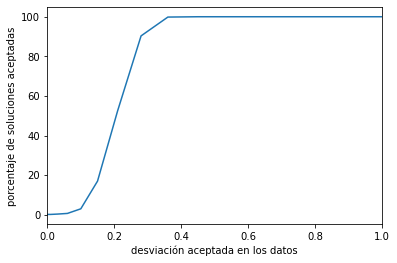

In [21]:
contador=0
#realizamos una prueba de  100 iteraciones para medir el porcentaje de soluciones válidas, primero medimos el mínimo y luego calculamos
# las soluciones determinadas como válidas dada una desviación.
minimo=math.inf
x=0
resultados=[]
desviacion=[]
porcentajes=[]

for k in range(100):
    x=x+k*0.01
    desviacion.append (x)

for i in range (600):
    valorActual= VC_TempleSimulado(20, 0,g3)
    resultados.append(valorActual)
    if  minimo> valorActual:
        minimo = valorActual
print( "el minimo es", minimo)

for x in desviacion:
    contador=0
    for i in resultados:
        if minimo +  x*minimo >= i:
            contador+=1
    porcentajes.append((contador/600)*100)

    
#  representación de gráficas
    
import numpy as np
import matplotlib.pyplot as plt


plt.ylabel('porcentaje de soluciones aceptadas')
plt.xlabel('desviación aceptada en los datos')
plt.plot (desviacion,porcentajes)
plt.xlim(0,1)
plt.show()


<h3> Respuesta</h3>

No siempre se obtienen soluciones óptimas ya que se trata de una heurística en la que interviene el azar, y no siempre se va a explorar el vecindario que tenga las soluciones óptimas. Para que ocurriese eso necesitaríamos un algoritmo de fuerza bruta, para así poder explorar <b> todas </b> las soluciones y obtener la mejor siempre, en todos los casos. El código utilizado para la realización de las pruebas es el siguiente:

___

~~~
contador=0

minimo=math.inf
x=0
resultados=[]
desviacion=[]
porcentajes=[]

for k in range(100):
    x=x+k*0.01
    desviacion.append (x)

for i in range (600):
    valorActual= VC_TempleSimulado(20, 0,g3)
    resultados.append(valorActual)
    if  minimo> valorActual:
        minimo = valorActual
print( "el minimo es", minimo)

for x in desviacion:
    contador=0
    for i in resultados:
        if minimo +  x*minimo >= i:
            contador+=1
    porcentajes.append((contador/600)*100)
    
~~~

___

Se comienza creando valores de desviación añadiendo al valor actual 0.01* la iteración de manera que a mayor valor mayor aumento, ya que donde interesa ver el crecimeitno es al principio, ya que es donde más va a variar y luego tenderá a estabilizarse porque las soluciones obtenidas se encuentran bastante agrupadas. Luego realizo 600 iteracciones y almaceno los resultados en *resultados* para analizarlos posteriormente cuantas veces se alcanza una solución similar al mínimo. La gráfica resultante es la siguiente:

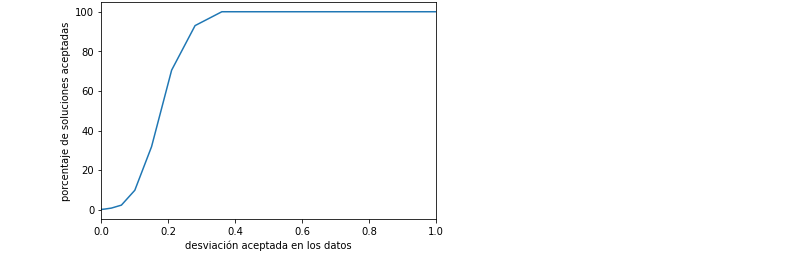

Como vemos, con una un 25% de desviación ya se obtiene cerca de un 80% de datos aceptables. Obviamente, cuanto mayor sea la desviación aceptada mayor será el porcentaje de soluciones válidas obtenidas.

<h1>Pregunta 3 </h1>
<h3>Implementación</h3>

el minimo es 164407.97824983246
el mediana es 187746.3643869721
la máximo es 208571.69766234182
Coste inicial: 164407.97824983246
___________________________________________________________
	0.00		0.43		0.86		1.29		1.71		2.14		2.57		3.00	
0.00	23.80	10220.61	20417.42	30614.23	40811.04	51007.86	61204.67	71401.48	
0.14	84.75	36392.00	72699.26	109006.51	145313.77	181621.03	217928.28	254235.54	
0.29	131.49	56464.66	112797.83	169131.01	225464.18	281797.35	338130.53	394463.70	
0.43	194.32	83446.85	166699.38	249951.91	333204.44	416456.97	499709.50	582962.03	
0.57	294.13	126307.29	252320.46	378333.63	504346.79	630359.96	756373.12	882386.29	
0.71	489.06	210015.78	419542.50	629069.22	838595.94	1048122.65	1257649.37	1467176.09	
0.86	1067.00	458201.22	915335.43	1372469.64	1829603.86	2286738.07	2743872.29	3201006.50	
1.00	1643997.58	705979530.98	1410315064.39	2114650597.79	2818986131.20	3523321664.61	4227657198.01	4931992731.42	
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

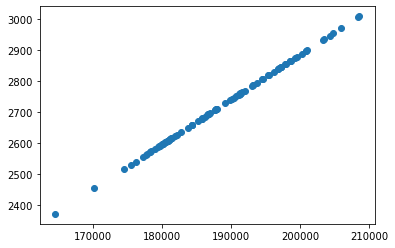

In [22]:
def VC_TempleSimulado_V2(vecCiudades, fi=0.50, nu=0.01 , C=-1):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    
    #si no introducimos coste, entonces se calcula mediante la solución incial
    if(C==-1): # nos servirá para realizar pruebas posteriormente
        tem_inici=(-nu/(math.log(fi)))*(calcula_costes(solucion_actual, vecCiudades))
    else:
        tem_inici=(-nu/(math.log(fi)))*C
        
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    
    for i in range (1000):
        T= tem_inici * math.exp( -0.0045*i)#actualizamos temperatura, al iniciarse i a 0 la temperatura final será igual a la inical
        solucion=solucion_actual.copy() # copiamos el vector

        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion

    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return (coste_inicial, tem_inici)




#grafica de relación coste con tem_inicial
elementos=[]
for i in range(100):
    elementos.append(VC_TempleSimulado_V2(g3))

plt.scatter(*zip(*elementos))


#cálculo de los costes con los que vamos a trabajar
import statistics
C=[]
C.append(min(elementos)[0])
C.append(statistics.median(list(zip(*elementos))[0]) )
C.append(max(elementos)[0])


print('el minimo es',C[0] )
print('el mediana es',C[1])
print('la máximo es',C[2] )


#creación de las tablas comparativas

#creamos matrices con los valores de T0 para C(S0)= 161612.73 variando fi entre 0.001 y 1 y nu entre  0 y 3 
import numpy as np
fi= np.linspace(0.001,0.9999,8)
nu= np.linspace(0.001,3,8)



        
for c in C:
    matriz=[[]]
    print('Coste inicial:', c)
    print('___________________________________________________________')
    for i in range (len(fi)):
        fila=[]
        fila.append(fi[i])
        for j in range (len(nu)):
            fila.append(VC_TempleSimulado_V2(g3,fi[i],nu[j],c)[1])
        matriz.append(fila)

    #imprimimos los valores de la cabecera correspondientes a los valores de nu con dos decimales espacioados por tabuladores
    
    for i in range (len(nu)):
        print('\t%.2f' % nu[i], end='\t')
  
    #imprimimos formateada la matriz con dos decimales y tabuladores
    for i in range (len(matriz)):
        for j in range (len(matriz[i])):
            print('%.2f' % matriz[i][j], end='\t')
        print()
    print(' _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')



<h3>Respuesta</h3>
Primero realizamos una ejecución para saber sobre cuanto darían los costes asociados a la primera solución para poder fijar en valores correctos C(S0). Tras realizarlo, fijando los parámetros fi y nu como al inicio nos daría lo siguiente:

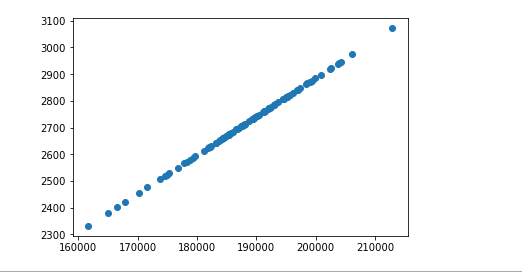

Podemos apreciar como C(S0) y la T_inicial tienen una relación lineal entre ambas, cuanto menos coste de la solución inicial menor temperatura, y conforme sube el coste de la solución inicial lo hace también la temperatura inicial. 
Para mostrar como influyen los valores de fi y nu a la T0 se fijó el parámetro C(S0) tomando los valores mínimo, mediana y máximo de los obtenidos en la ejecución de la función anterior.

Para los valores de fi se utilizó la siguiente línea de código:

~~~
fi= np.linspace(0.001,1,8)
~~~

Con ella tomamos 8 valores de entre 0.001 y 1. Se ha decidido realizar este rango ya que la probabilidad va a estar en tanto por uno, por lo que no tendría sentido pasar de 1. Además, para evitar errores de matemáticos en ln(0), se excluye esta posibilidad.
Para nu se realió el mismo código que para fi pero en este caso de la siguiente forma:

~~~
nu= np.linspace(0.001,3,8)
~~~

Es decir, el rango de los 8 valores estará entre 0.001 y 3 ya que no tendría sentido que el porcentaje de empeoramiento fuese 0 ni que pasase del 300%.

Las tablas obtenidas fueron las siguientes:

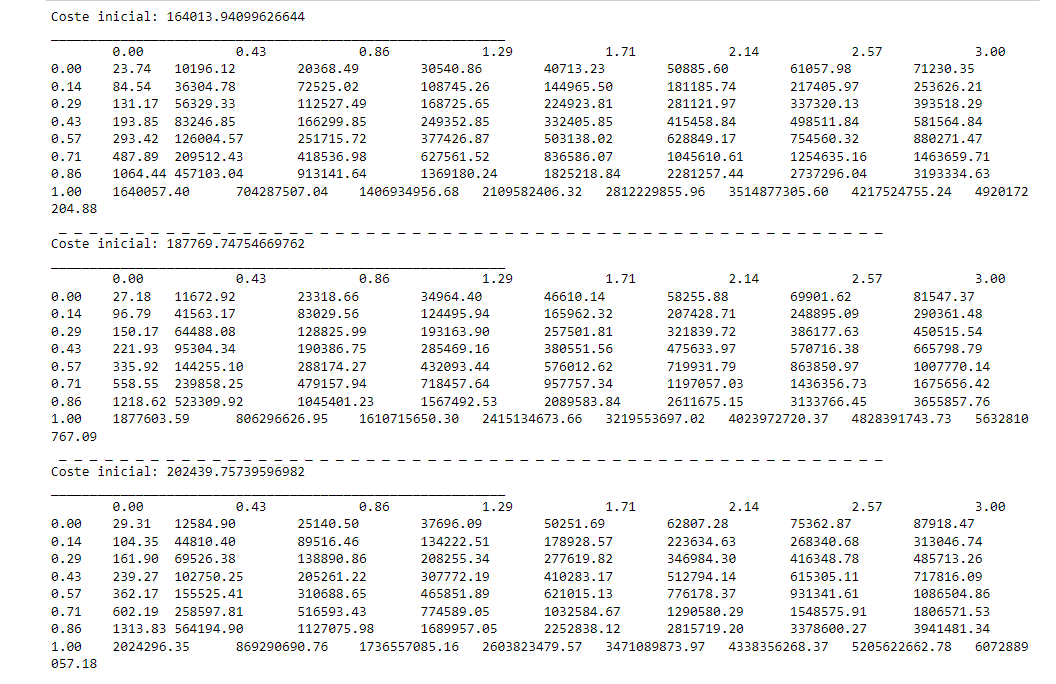

Podemos ver que existe una relación lineal entre todos los parámetros con respecto a T0, cuanto menor coste, menor nu y menor fi, T0 será de menor valor aumentando de forma lineal. Por lo que la T0 mínima será la uqe corresponde con el menor coste, el menor nu y el menor fi. Y la T0 mayor se corresponderá con los mayores valores de los parámetros mencionados.



<h1>Pregunta 4 </h1>
Escoge 5 combinaciones variadas de parámetros (incluidos los que regulan el mecanismo de enfriamiento, e.g., 𝜆). Ejecuta el algoritmo de Temple Simulado con esas combinaciones. Guarda los resultados en una celda, y discute los resultados obtenidos en cuanto a la calidad de las soluciones obtenidas.
<h3>Implementación </h3>



In [23]:
def VC_TempleSimulado_V4(vecCiudades, fi=0.50, nu=0.01 , C=-1, landa=0.0045):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    if(C==-1):
        tem_inici=(-nu/(math.log(fi)))*(calcula_costes(solucion_actual, vecCiudades))
    else:
        tem_inici=(-nu/(math.log(fi)))*C
    
    
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    for i in range (1000):
        T= tem_inici * math.exp( -landa*i)
        solucion=solucion_actual.copy() # copiamos el vector

        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion

    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)


combinaciones=[]
#las combinaciones de valores decididos osn los siguientes.
combinaciones.append([fi[0], nu[0], C[0]])
combinaciones.append([fi[2], nu[5], C[0]])
combinaciones.append([fi[3], nu[7], C[1]])
combinaciones.append([fi[6], nu[7], C[1]])
combinaciones.append([fi[7], nu[7], C[2]])



#función para calcular porcentaje acierto
def acierto(fi, nu, coste,landa=0.045):
    contador=0
    minimo=math.inf
    x=0.18
    resultados=[]
    
    for i in range (250):
        valorActual= VC_TempleSimulado_V4(g3,fi,nu,coste, landa)
        resultados.append(valorActual)
        if  minimo > valorActual:
            minimo = valorActual
    print( "el minimo es", minimo)

    for i in resultados:
        if minimo +  x*minimo >= i:
            contador+=1
    
    return (contador/250)*100,resultados

a=1;
auxiliar=[]
landa=[]
landa= np.linspace(0.001,0.01,3)
k=1
for combinacion in combinaciones:
    print('COMBINACIÓN NÚMERO', k)
    k+=1
    for lan in landa:
        auxiliar.append(acierto(combinacion[0], combinacion[1], combinacion[2], lan))
        print('LANDA: %.4f'%lan,' el porcentaje de acierto es de ',auxiliar[a-1][0], '%')
        a+=1
    print()

COMBINACIÓN NÚMERO 1
el minimo es 74317.06288853662
LANDA: 0.0010  el porcentaje de acierto es de  62.4 %
el minimo es 72546.72866975307
LANDA: 0.0055  el porcentaje de acierto es de  34.4 %
el minimo es 73369.04425811728
LANDA: 0.0100  el porcentaje de acierto es de  46.400000000000006 %

COMBINACIÓN NÚMERO 2
el minimo es 162630.7332815238
LANDA: 0.0010  el porcentaje de acierto es de  64.0 %
el minimo es 130638.7717248491
LANDA: 0.0055  el porcentaje de acierto es de  66.4 %
el minimo es 91470.67203494521
LANDA: 0.0100  el porcentaje de acierto es de  83.6 %

COMBINACIÓN NÚMERO 3
el minimo es 164857.09743292083
LANDA: 0.0010  el porcentaje de acierto es de  81.2 %
el minimo es 147649.88933762658
LANDA: 0.0055  el porcentaje de acierto es de  70.39999999999999 %
el minimo es 93876.521548024
LANDA: 0.0100  el porcentaje de acierto es de  63.2 %

COMBINACIÓN NÚMERO 4
el minimo es 167087.63939335407
LANDA: 0.0010  el porcentaje de acierto es de  81.6 %
el minimo es 165196.44953687515
LAN

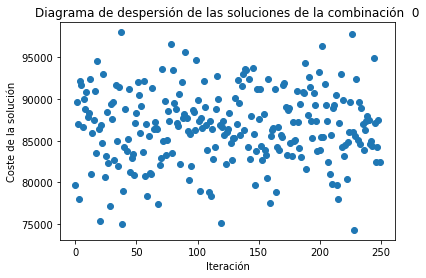

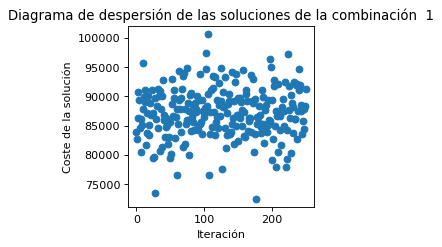

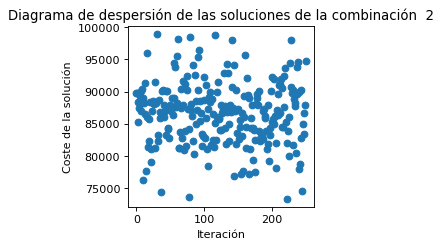

NUEVA COMBINACION
______________________________


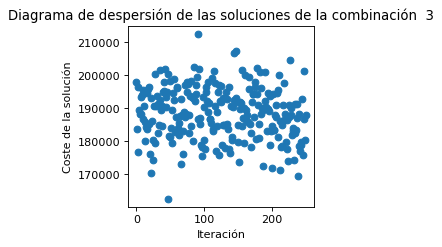

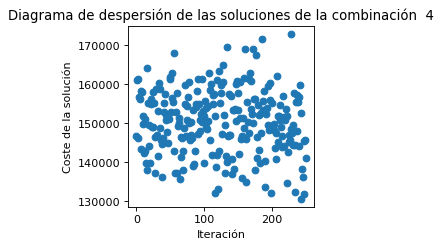

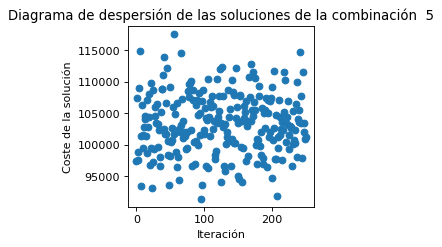

NUEVA COMBINACION
______________________________


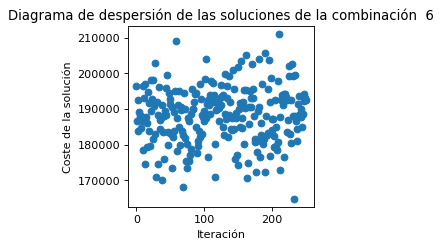

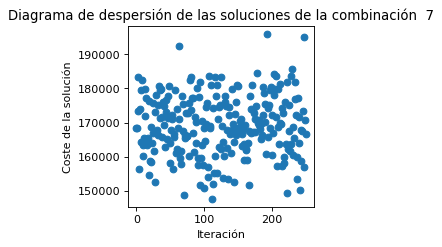

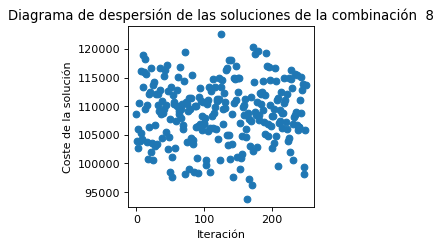

NUEVA COMBINACION
______________________________


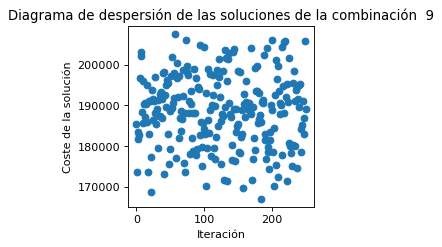

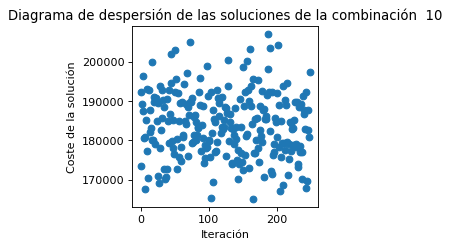

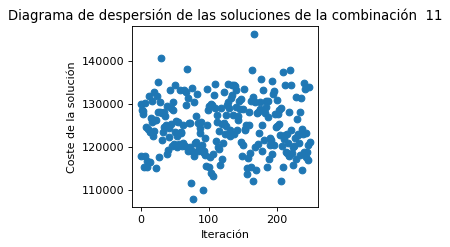

NUEVA COMBINACION
______________________________


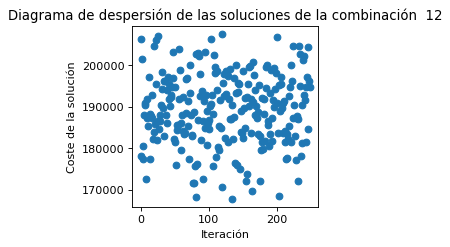

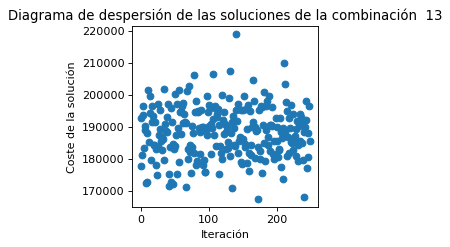

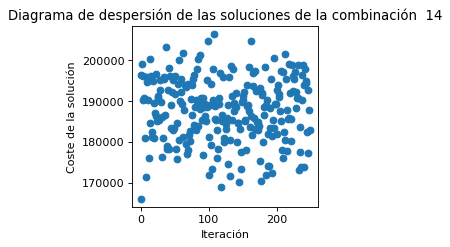

In [24]:
a=0

for i in auxiliar:
    y=[x for x in range (len(i[1]))]
    plt.scatter(y, i[1])
    if (a)%3==0 and a!=0:
        print('NUEVA COMBINACION')
        print('______________________________')
    plt.xlabel('Iteración')
    plt.ylabel('Coste de la solución')
    texto='Diagrama de despersión de las soluciones de la combinación  '+str(a)
    plt.title(texto)
    
    a+=1
    plt.show()  
    plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':80})

In [25]:
a=0
for i in auxiliar:
    print(np.mean(i[1]))
    if (a+1)%3==0 and a!=0:
        print('NUEVA COMBINACION')
        print('______________________________')
    a+=1

86618.72395444295
87130.9105268367
86621.55393650074
NUEVA COMBINACION
______________________________
188451.87107291823
150395.84982826692
103351.53843205402
NUEVA COMBINACION
______________________________
188181.66489616316
169210.71333256667
108871.41095074502
NUEVA COMBINACION
______________________________
188655.63510979633
183981.3115044243
124849.70806724572
NUEVA COMBINACION
______________________________
189290.0063807764
188247.92545566417
187684.90251422292
NUEVA COMBINACION
______________________________


<h3>Respuesta</h3>
Como podemos ver en la salida del comando anterior la mejor solución sería con la combinación de parámetros que dá el menor valor de T0, es decir, los números menores de fi, nu y coste. Ya que, la mejor solución aportada de entre las 5 combinaciones es la proporcionada por la primera de ellas.
En todas las combinaciones seleccionadas los costes asociados, en general, se agrupan con respecto al mínimo aportado, con una desviación del 18%. Si realizásemos gráficas de dispersión podríamos obsrvar como esto es así, por ejemplo, para el primero, la mayor parte de puntos se encuentra, con la desviación mencionada en datos con menor valor que 88.500:

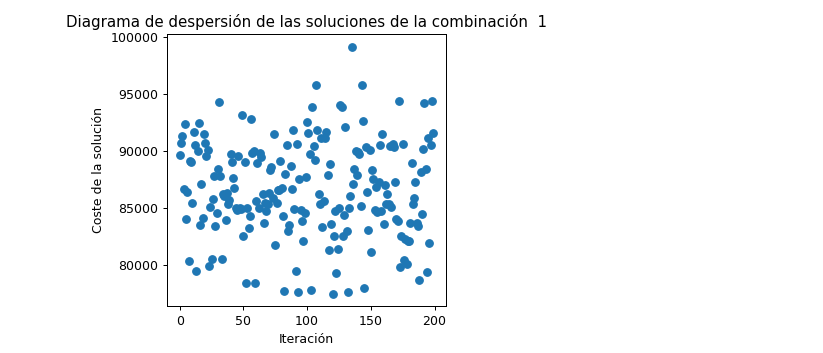

 Si vemos la segunda combinación, los valores obtenidos del mínimo son bastante más elevados que respecto a la primera combinción. También es importante destacar, que pese a presentar valores más altos de costo asociado al camino solución, los valores obtenidos en las ejecuciones suelen a ser más estables y estar más agrupados con respecto al mínimo obtenido, siendo los porcentajes de acierto más elevados.

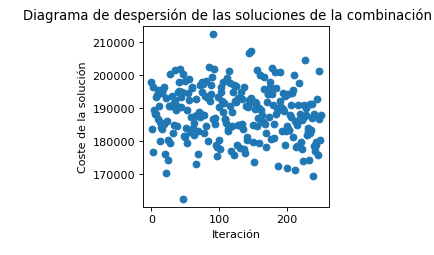

A partir de esas cinco combinaciones se realizaron pruebas con distintos valores de lamda entre 0.001 y 0.01, los valores obtenidos son similares a los iniciales con landa=0.0045. Se puede ver, como a medida que aumenta landa su valor los valores de coste son menores, en general que con el inicial. Además, como consecuencia el rango de las soluciones obtenidas es menor, ya que el mínimo disminuye pero también el valor máiximo. Además, la media de los valores obtenidos también tiene una tendencia a la baja cuanto mayor sea el valor de landa, siendo más notable con valores de T0 mayores. 

Tiene sentido que, al aumentar landa a veces mejoren notablemente los resultados ya que estaríamos aumentando la probabilidad de que se escojan  soluciones peores para evitar mínimos locales y buscar una solución global mejor. Por eso, para el primer problema, que se acerca al mínimo global, empeora un poco, sin embargo, en las otras combinaciones que se acercan a un mínimo local mejora. Hay que destacar que los valores de landa escogidos son bajos, ya que no tendría sentido aceptar con, por ejemplo, un 90% de probabilidad una solución peor que la actual. Por ello se escogió un rango en los que la probabilidad de aceptación estaría entre cerca de un 0% y un 1%. Si escogiésemos valores más altos seguramente empeoren los resultados obtenidos ya que el algorimo estaría demasiado condicionado y se aceptarían soluciones peores casi siempre.




*P1.2: Implementación mejoras* (4 puntos)

<h1> Pregunta 5 </h1>
Implementa un laboratorio para evaluar el impacto de las mejoras consideradas. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.

<h3> Implementación</h3>

In [26]:
def VC_TempleSimulado_V5(vecCiudades, fi=0.001, nu=0.001 , C=162584.74, landa=0.0055):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    tem_inici=(-nu/(math.log(fi)))*C
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    for i in range (1000):
        T= tem_inici * math.exp( -landa*i)
        solucion=solucion_actual.copy() # copiamos el vector

        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion

    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)


El minimo es 73691.40986777873 y da un porcentaje de acierto de 50.0 y la media de las soluciones es 86858.61117535665


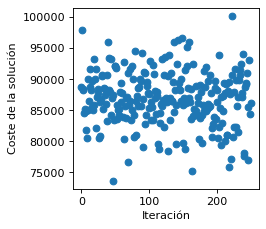

In [32]:
#realizamos las pruebas para  la vesrión sin modificar
import numpy as np

import matplotlib.pyplot as plt
x=0.18
resultados=[]
for i in range (250):
    valorActual= VC_TempleSimulado_V5(g3)
    resultados.append(valorActual)
    if  minimo > valorActual:
        minimo = valorActual
print( "El minimo es", minimo, 'y da un porcentaje de acierto de ', end='')

contador=0
media=0
for i in resultados:
    if minimo +  x*minimo >= i:
        contador+=1
    media+=i

print((contador/250)*100,'y la media de las soluciones es', media/250)

#creamos un gráfico de dispersión de los resultados obtenidos
y=[x for x in range (len(resultados))]
plt.scatter(y, resultados)
plt.xlabel('Iteración')
plt.ylabel('Coste de la solución')
plt.show()  
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':80})


El minimo es  71722.53889983337 y da un porcentaje de acierto de 100.0 y la media de las soluciones es 86604.59970500496


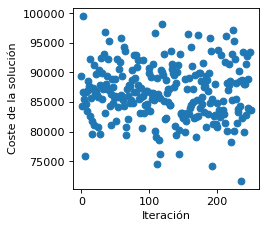

In [33]:
def VC_TempleSimulado_V5_1_0(vecCiudades,tem_final=300, fi=0.001, nu=0.001 , C=162584.74, landa=0.0045):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    tem_inic=(-nu/(math.log(fi)))*C
    T=tem_inic
    
    for a in range(1000):
        
        solucion=solucion_actual.copy() # copiamos el vector
        selecciona_vecino(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion
        T= tem_inic /(1+a) #cambiamos la velocidad de enfriamiento para ver la diferencia
        a+=1
    
    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)



#realizamos las pruebas para 
import numpy as np

import matplotlib.pyplot as plt
x=0.18
resultados=[]

for i in range (250):
    valorActual= VC_TempleSimulado_V5_1_0(g3)
    resultados.append(valorActual)
    if  minimo > valorActual:
        minimo = valorActual
print( "El minimo es ", minimo, 'y da un porcentaje de acierto de ', end='')

contador=0
media=0
minimo=math.inf
for i in resultados:
    if minimo +  x*minimo >= i:
        contador+=1
    media+=i

print((contador/250)*100,'y la media de las soluciones es', media/250)

#creamos un gráfico de dispersión de los resultados obtenidos
y=[x for x in range (len(resultados))]
plt.scatter(y, resultados)
plt.xlabel('Iteración')
plt.ylabel('Coste de la solución')
plt.show()  


El minimo es  44907.69171881279 y da un porcentaje de acierto de 100.0 y la media de las soluciones es 56848.76480880287


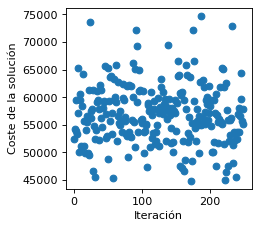

In [34]:

def selecciona_vecino_v2(vector):
    posicion1= random.randint(0, len(vector)-1)
    posicion2= random.randint(0, len(vector)-1)
    while posicion1==posicion2:     # en canso de que sean iguales, para no permutar la misma posición, volvemos a buscar otro número
        posicion2= random.randint(0,  len(vector)-1)
        
    vector.insert( vector.pop(posicion1), posicion2)


def VC_TempleSimulado_V5_1(vecCiudades,tem_final=300, fi=0.001, nu=0.001 , C=162584.74, landa=0.0045):
    #creamos el vector inicial con el número de ciudades y lo permutamos de forma aleatoria para usarlo como vector inicial
    solucion_actual = [x for x in range (1,vecCiudades.nciudades)]
    random.shuffle(solucion_actual)
    coste_inicial=calcula_costes(solucion_actual,vecCiudades)
    tem_inic=(-nu/(math.log(fi)))*C
    T=tem_inic
    
    for a in range(1000):
        
        solucion=solucion_actual.copy() # copiamos el vector
        selecciona_vecino_v2(solucion) #guardamos en el vector solución el vector vecino de la solución actual
        delta= calcula_costes(solucion, vecCiudades) - calcula_costes(solucion_actual,vecCiudades)
        if   delta < 0 or random.uniform(0,1) < math.exp(-delta/T) :
            solucion_actual = solucion
        T= tem_inic /(1+a) 
        a+=1
    
    solucion=solucion_actual
    solucion_actual= [0]+solucion_actual+[0]
    return calcula_costes(solucion, vecCiudades)



#realizamos las pruebas para 
import numpy as np

import matplotlib.pyplot as plt
x=0.18
resultados=[]

for i in range (250):
    valorActual= VC_TempleSimulado_V5_1(g3)
    resultados.append(valorActual)
    if  minimo > valorActual:
        minimo = valorActual
print( "El minimo es ", minimo, 'y da un porcentaje de acierto de ', end='')

contador=0
media=0
minimo=math.inf
for i in resultados:
    if minimo +  x*minimo >= i:
        contador+=1
    media+=i

print((contador/250)*100,'y la media de las soluciones es', media/250)

#creamos un gráfico de dispersión de los resultados obtenidos
y=[x for x in range (len(resultados))]
plt.scatter(y, resultados)
plt.xlabel('Iteración')
plt.ylabel('Coste de la solución')
plt.show()  





In [29]:
print(VC_TempleSimulado_V5_1(g3))
max(resultados)

59113.379687362714


74377.1858033104

<h3>Respuesta </h3>

Las optimizaciones realizaras fueron:
* Velocidad de enfriamiento
* Criterio de selección de candidatas

Para la implemetación se opto por escoger los valores con soluciones más óptimas del ejercicio anterior, que son la fi,nu y coste de menor valor. Los valores obtenidos fueron los siguientes: como mínimo coste= 70743.53, con % de acierto alrededor del 27% y con una media de resultados 86614.61. Para intentar mejorar las soluciones se obtó por modificar la velocidad de enfriamiento. El gráfico de dispersión de las soluciones es el siguiente:

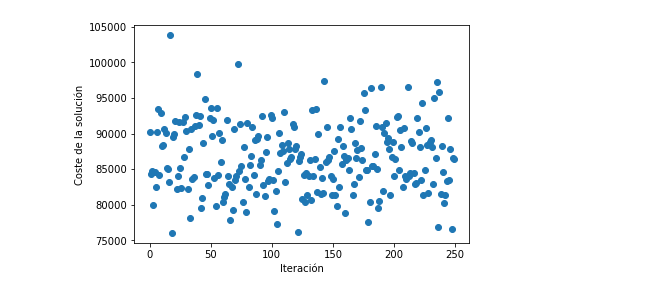

En el podeos ver como en varias ocasiones se alcanza el mínimo y, además, salen valores cercanos a el en más de un 25% de los casos, este porcentaje no es bueno, pero la combinación sí es la que mejores resultados en cuanto al coste nos proporciona.

Para cambiar y mejorar este resultado se ha decidido por cambiar el mecanismo de enfriamiento, pasando del antiguo al esquema de cauchy que disminuye de forma más paulatina al principio y más pronunciado al final, esto ayudará a llegar a un estado de tendencia a 0 de la temperatura. Además, se cambió el método de selección de las soluciones optando por una insercción de uno de las ciudades, de forma que iremos discriminando cual de ellas es la que menor coste tiene, en el mecanismo anterior intercambiábamos 2 pero puede que una de ellas empeorase y la otra mejorase, de forma que el resultado total fuese peor pese a tener una solución parcial mejor.
Primero se introdujo la mejora del cambio en cuanto al enfriamiento y podemos ver como el coste mínimo obtenido se mantiene pero mejora al porcentaje de mejora encontrandose las soluciones agrupadas cerca del mínimo con un máximo de desviación del 18%. Es decir, al cambiar la velocidad de enfriamiento nos ayuda a que los resultados se encuentren más agrupados


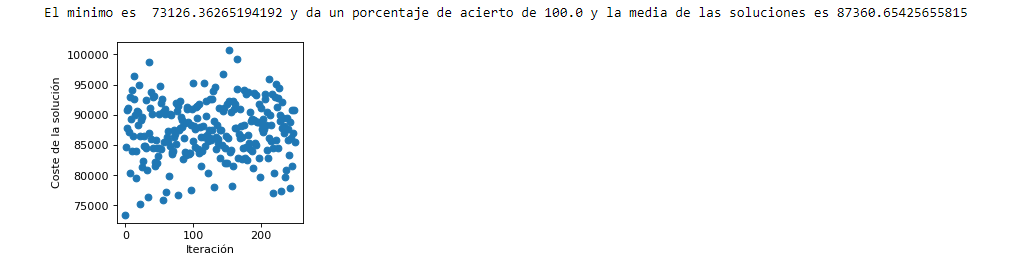


Ahora se procedió a incluir la segunda mejora en el código, que correspondería con el cambio en la selección de la solución vecina. Tras la realización de esto se obtuvieron los siguientes resultados:

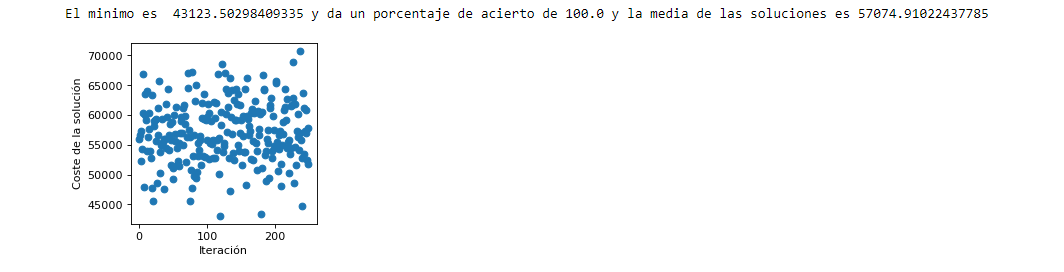


Como podemos observar en el gráfico todos los valores se encuentran más agrupados en valores medios, llegando a un mínimo de alrededor de 43K de coste. Además, todos los resultados se encuentran cerca de este con una desviación del 18%. Por otra parte, también es importante destacar que los valores de las soluciones de las 250 iteraciones tienen una media de 57000 de costo, bastante cercano al mínimo y por debajo del mínimo obtenido con el algoritmo anterior.
Además, el máximo obtenido en las ejecuciones es menor que el mínimo del algorimo no mejorado. Con estos resultados podemos concluir que la versión con las mejoras es mejor en el 100% de los casos que la versión base.


También se estudió utilizar un criterio de parada que dependiese de una temperatura final, pero tras leer diversos artículos se obtuvo que, en general, se calcula la temperatura final a partir del número de iteraciones que se quieran realizar siguientdo la relación de:  Tf= T0/ a ^(número de iteraciones) donde a representa un número entre 0 y 1,  por lo que sería similar a nuestro algoritmo.
